In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Importing the data set


In [6]:
dataset = pd.read_csv('Property_data.csv')
dataset.head(50)
pd.set_option('display.max_columns',None)

# Look of the data set

In [7]:
dataset.head(25)

,PropertyID,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,Orientation,Grade,Neighborhood,Condition1,Condition2,BldgType,PropertyStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Roof1Material,Roof2Material,ExteriorCladdingType,ExteriorCladdingArea,ExterQual,ExterCond,PropertyFooting,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinRat1,BsmntFinSty1,BsmntFinQual1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,Heating,HeatingEfficiency,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementType,BasementYrBlt,BasementFinish,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon

# Information about the data set

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

# columns of the dataset

In [9]:
dataset.columns

Index(['PropertyID', 'PropertyClass', 'PropertyZone', 'PropertyFrontage',
       'PropertySize', 'Street', 'Alley', 'PropertyShape', 'Elevation',
       'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'PropertyStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingType', 'ExteriorCladdingArea',
       'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish',
       'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinSty1',
       'BsmntFinQual1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1',
       'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'QualFireplace', 'BasementType',
       'BasementYrBlt

# statistical value of the data

In [12]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PropertyID,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
PropertyClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
PropertyFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
PropertySize,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
ExteriorCladdingArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmntFinSty1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# checking the coorelation between the  numerical varibales


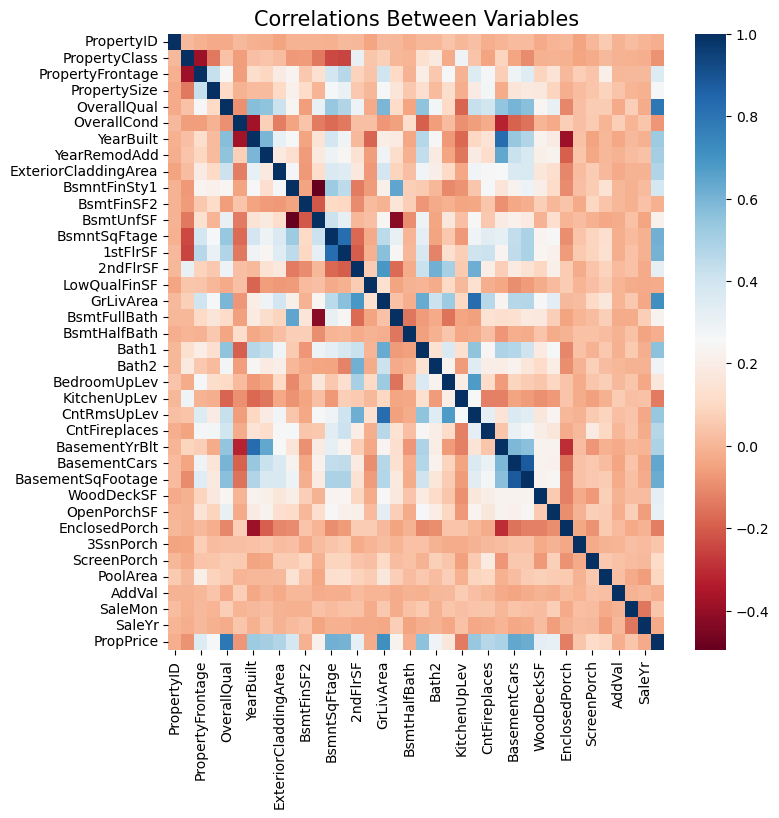

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

# evaluation of the missing values

In [15]:
print("Missing Values by Column")
print("-"*20)
print(dataset.isna().sum())
print("-"*20)
print("TOTAL MISSING VALUES:",dataset.isna().sum().sum())

Missing Values by Column
--------------------
PropertyID            0
PropertyClass         0
PropertyZone          0
PropertyFrontage    259
PropertySize          0
                   ... 
SaleMon               0
SaleYr                0
SaleType              0
SaleCondn             0
PropPrice             0
Length: 81, dtype: int64
--------------------
TOTAL MISSING VALUES: 6965


#Percentage of NAN Values 

In [18]:
NAN = [(c, dataset[c].isna().mean()*100) for c in dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

In [19]:
NAN.head(30)

,column_name,percentage
0,PropertyID,0.000000
1,PropertyClass,0.000000
2,PropertyZone,0.000000
3,PropertyFrontage,17.739726
4,PropertySize,0.000000
5,Street,0.000000
6,Alley,93.767123
7,PropertyShape,0.000000
8,Elevation,0.000000
9,Amenities,0.000000


In [20]:
NAN = NAN[NAN.percentage > 50]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.520548
74,AddFeatures,96.301370
6,Alley,93.767123
73,BoundaryFeatures,80.753425


In [21]:
dataset1 = dataset.drop(['Alley','PoolQC','BoundaryFeatures','AddFeatures'],axis=1)

# split the dataset into two sub data sets consist of numerical and object data types for data cleaning

In [22]:
object_columns_df = dataset1.select_dtypes(include=['object'])
numerical_columns_df =dataset1.select_dtypes(exclude=['object'])

In [23]:
object_columns_df.dtypes

PropertyZone            object
Street                  object
PropertyShape           object
Elevation               object
Amenities               object
Orientation             object
Grade                   object
Neighborhood            object
Condition1              object
Condition2              object
BldgType                object
PropertyStyle           object
RoofStyle               object
RoofMatl                object
Roof1Material           object
Roof2Material           object
ExteriorCladdingType    object
ExterQual               object
ExterCond               object
PropertyFooting         object
BsmntFinish             object
BsmntMaintenance        object
BsmntVisibility         object
BsmntFinRat1            object
BsmntFinQual1           object
Heating                 object
HeatingEfficiency       object
CentralAir              object
Electrical              object
KitchenQual             object
Functional              object
QualFireplace           object
Basement

In [24]:
numerical_columns_df.dtypes

PropertyID                int64
PropertyClass             int64
PropertyFrontage        float64
PropertySize              int64
OverallQual               int64
OverallCond               int64
YearBuilt                 int64
YearRemodAdd              int64
ExteriorCladdingArea    float64
BsmntFinSty1              int64
BsmtFinSF2                int64
BsmtUnfSF                 int64
BsmntSqFtage              int64
1stFlrSF                  int64
2ndFlrSF                  int64
LowQualFinSF              int64
GrLivArea                 int64
BsmtFullBath              int64
BsmtHalfBath              int64
Bath1                     int64
Bath2                     int64
BedroomUpLev              int64
KitchenUpLev              int64
CntRmsUpLev               int64
CntFireplaces             int64
BasementYrBlt           float64
BasementCars              int64
BasementSqFootage         int64
WoodDeckSF                int64
OpenPorchSF               int64
EnclosedPorch             int64
3SsnPorc

##Number of null values in each feature

In [25]:
null_counts = object_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
PropertyZone              0
Street                    0
PropertyShape             0
Elevation                 0
Amenities                 0
Orientation               0
Grade                     0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
PropertyStyle             0
RoofStyle                 0
RoofMatl                  0
Roof1Material             0
Roof2Material             0
ExteriorCladdingType      8
ExterQual                 0
ExterCond                 0
PropertyFooting           0
BsmntFinish              37
BsmntMaintenance         37
BsmntVisibility          38
BsmntFinRat1             37
BsmntFinQual1            38
Heating                   0
HeatingEfficiency         0
CentralAir                0
Electrical                1
KitchenQual               0
Functional                0
QualFireplace           690
BasementType             81
BasementFinish           81
BasementQu

In [26]:
# max and min, null values in the column

In [27]:
columns_None = ['BsmntFinish','BsmntMaintenance','BsmntVisibility','BsmntFinRat1','BsmntFinQual1','QualFireplace','BasementType','BasementFinish','BasementQual','BasementCond']
object_columns_df[columns_None]= object_columns_df[columns_None].fillna('None')

In [28]:
columns_with_lowNA = ['ExteriorCladdingType','Electrical']

In [29]:
#fill missing values for each column (using its own most frequent value)
object_columns_df[columns_with_lowNA] = object_columns_df[columns_with_lowNA].fillna(object_columns_df.mode().iloc[0])

In [30]:
null_counts = numerical_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
PropertyID                0
PropertyClass             0
PropertyFrontage        259
PropertySize              0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
ExteriorCladdingArea      8
BsmntFinSty1              0
BsmtFinSF2                0
BsmtUnfSF                 0
BsmntSqFtage              0
1stFlrSF                  0
2ndFlrSF                  0
LowQualFinSF              0
GrLivArea                 0
BsmtFullBath              0
BsmtHalfBath              0
Bath1                     0
Bath2                     0
BedroomUpLev              0
KitchenUpLev              0
CntRmsUpLev               0
CntFireplaces             0
BasementYrBlt            81
BasementCars              0
BasementSqFootage         0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch             0
3SsnPorch                 0
ScreenPorch               0
PoolArea                  0
AddVal    

In [31]:
print((numerical_columns_df['SaleYr']-numerical_columns_df['YearBuilt']).median())
print(numerical_columns_df["PropertyFrontage"].median())

35.0
69.0


In [32]:
numerical_columns_df['BasementYrBlt'] = numerical_columns_df['PropertyFrontage'].fillna(numerical_columns_df['SaleYr']-35)
numerical_columns_df['PropertyFrontage'] = numerical_columns_df['PropertyFrontage'].fillna(69)

In [33]:
numerical_columns_df= numerical_columns_df.fillna(0)

In [34]:
numerical_columns_df.head(20)

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,CntRmsUpLev,CntFireplaces,BasementYrBlt,BasementCars,BasementSqFootage,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,65.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,80.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,68.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,60.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,84.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,85.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,75.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,69.0,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1974.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,51.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,50.0,1,205,0,4,0,0,0,0,0,1,2008,118000


In [36]:
numerical_columns_df['Age_House']= (numerical_columns_df['SaleYr']-numerical_columns_df['YearBuilt'])

In [41]:
numerical_columns_df.head(2)

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,CntRmsUpLev,CntFireplaces,BasementYrBlt,BasementCars,BasementSqFootage,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice,Age_House
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,65.0,2,548,0,61,0,0,0,0,0,2,2008,208500,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,80.0,2,460,298,0,0,0,0,0,0,5,2007,181500,31


In [42]:
numerical_columns_df['Age_House'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age_House, dtype: float64

In [43]:
Negatif = numerical_columns_df[numerical_columns_df['Age_House'] < 0]
Negatif

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,CntRmsUpLev,CntFireplaces,BasementYrBlt,BasementCars,BasementSqFootage,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice,Age_House


In [44]:
numerical_columns_df.head(20)

,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,CntRmsUpLev,CntFireplaces,BasementYrBlt,BasementCars,BasementSqFootage,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice,Age_House
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,65.0,2,548,0,61,0,0,0,0,0,2,2008,208500,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,80.0,2,460,298,0,0,0,0,0,0,5,2007,181500,31
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,68.0,2,608,0,42,0,0,0,0,0,9,2008,223500,7
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,60.0,3,642,0,35,272,0,0,0,0,2,2006,140000,91
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,84.0,3,836,192,84,0,0,0,0,0,12,2008,250000,8
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,85.0,2,480,40,30,0,320,0,0,700,10,2009,143000,16
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,75.0,2,636,255,57,0,0,0,0,0,8,2007,307000,3
7,8,60,69.0,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1974.0,2,484,235,204,228,0,0,0,350,11,2009,200000,36
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,51.0,2,468,90,0,205,0,0,0,0,4,2008,129900,77
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,50.0,1,205,0,4,0,0,0,0,0,1,2008,118000,69


In [91]:
#Select categorical features
rest_object_columns = object_columns_df.select_dtypes(include=['object'])
#Using One hot encoder
object_columns_df = pd.get_dummies(object_columns_df, columns=rest_object_columns.columns)

In [47]:
object_columns_df.head(20)

,PropertyZone_C (all),PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Grvl,Street_Pave,PropertyShape_IR1,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_Bnk,Elevation_HLS,Elevation_Low,Elevation_Lvl,Amenities_AllPub,Amenities_NoSeWa,Orientation_Corner,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Gtl,Grade_Mod,Grade_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Fin,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Roof1Material_AsbShng,Roof1Material_AsphShn,Roof1Material_BrkComm,Roof1Material_BrkFace,Roof1Material_CBlock,Roof1Material_CemntBd,Roof1Material_HdBoard,Roof1Material_ImStucc,Roof1Material_MetalSd,Roof1Material_Plywood,Roof1Material_Stone,Roof1Material_Stucco,Roof1Material_VinylSd,Roof1Material_Wd Sdng,Roof1Material_WdShing,Roof2Material_AsbShng,Roof2Material_AsphShn,Roof2Material_Brk Cmn,Roof2Material_BrkFace,Roof2Material_CBlock,Roof2Material_CmentBd,Roof2Material_HdBoard,Roof2Material_ImStucc,Roof2Material_MetalSd,Roof2Material_Other,Roof2Material_Plywood,Roof2Material_Stone,Roof2Material_Stucco,Roof2Material_VinylSd,Roof2Material_Wd Sdng,Roof2Material_Wd Shng,ExteriorCladdingType_BrkCmn,ExteriorCladdingType_BrkFace,ExteriorCladdingType_None,ExteriorCladdingType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,PropertyFooting_BrkTil,PropertyFooting_CBlock,PropertyFooting_PConc,PropertyFooting_Slab,PropertyFooting_Stone,PropertyFooting_Wood,BsmntFinish_Ex,BsmntFinish_Fa,BsmntFinish_Gd,BsmntFinish_None,BsmntFinish_TA,BsmntMaintenance_Fa,BsmntMaintenance_Gd,BsmntMaintenance_None,BsmntMaintenance_Po,BsmntMaintenance_TA,BsmntVisibility_Av,BsmntVisibility_Gd,BsmntVisibility_Mn,BsmntVisibility_No,BsmntVisibility_None,BsmntFinRat1_ALQ,BsmntFinRat1_BLQ,BsmntFinRat1_GLQ,BsmntFinRat1_LwQ,BsmntFinRat1_None,BsmntFinRat1_Rec,BsmntFinRat1_Unf,BsmntFinQual1_ALQ,BsmntFinQual1_BLQ,BsmntFinQual1_GLQ,BsmntFinQual1_LwQ,BsmntFinQual1_None,BsmntFinQual1_Rec,BsmntFinQual1_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingEfficiency_Ex,HeatingEfficiency_Fa,HeatingEfficiency_Gd,HeatingEfficiency_Po,HeatingEfficiency_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,QualFireplace_Ex,QualFireplace_Fa,QualFireplace_Gd,QualFireplace_None,QualFireplace_Po,QualFireplace_TA,BasementType_2Types,BasementType_Attchd,BasementType_Basment,BasementType_BuiltIn,BasementType_CarPort,BasementType_Detchd,BasementType_None,BasementFinish_Fin,BasementFinish_None,BasementFinish_RFn,BasementFinish_Unf,Baseme

In [55]:
object_columns_df['PropertyShape_IR1'].values

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [48]:
df_final = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
df_final.head(10)

,PropertyZone_C (all),PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Grvl,Street_Pave,PropertyShape_IR1,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_Bnk,Elevation_HLS,Elevation_Low,Elevation_Lvl,Amenities_AllPub,Amenities_NoSeWa,Orientation_Corner,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Gtl,Grade_Mod,Grade_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Fin,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Roof1Material_AsbShng,Roof1Material_AsphShn,Roof1Material_BrkComm,Roof1Material_BrkFace,Roof1Material_CBlock,Roof1Material_CemntBd,Roof1Material_HdBoard,Roof1Material_ImStucc,Roof1Material_MetalSd,Roof1Material_Plywood,Roof1Material_Stone,Roof1Material_Stucco,Roof1Material_VinylSd,Roof1Material_Wd Sdng,Roof1Material_WdShing,Roof2Material_AsbShng,Roof2Material_AsphShn,Roof2Material_Brk Cmn,Roof2Material_BrkFace,Roof2Material_CBlock,Roof2Material_CmentBd,Roof2Material_HdBoard,Roof2Material_ImStucc,Roof2Material_MetalSd,Roof2Material_Other,Roof2Material_Plywood,Roof2Material_Stone,Roof2Material_Stucco,Roof2Material_VinylSd,Roof2Material_Wd Sdng,Roof2Material_Wd Shng,ExteriorCladdingType_BrkCmn,ExteriorCladdingType_BrkFace,ExteriorCladdingType_None,ExteriorCladdingType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,PropertyFooting_BrkTil,PropertyFooting_CBlock,PropertyFooting_PConc,PropertyFooting_Slab,PropertyFooting_Stone,PropertyFooting_Wood,BsmntFinish_Ex,BsmntFinish_Fa,BsmntFinish_Gd,BsmntFinish_None,BsmntFinish_TA,BsmntMaintenance_Fa,BsmntMaintenance_Gd,BsmntMaintenance_None,BsmntMaintenance_Po,BsmntMaintenance_TA,BsmntVisibility_Av,BsmntVisibility_Gd,BsmntVisibility_Mn,BsmntVisibility_No,BsmntVisibility_None,BsmntFinRat1_ALQ,BsmntFinRat1_BLQ,BsmntFinRat1_GLQ,BsmntFinRat1_LwQ,BsmntFinRat1_None,BsmntFinRat1_Rec,BsmntFinRat1_Unf,BsmntFinQual1_ALQ,BsmntFinQual1_BLQ,BsmntFinQual1_GLQ,BsmntFinQual1_LwQ,BsmntFinQual1_None,BsmntFinQual1_Rec,BsmntFinQual1_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingEfficiency_Ex,HeatingEfficiency_Fa,HeatingEfficiency_Gd,HeatingEfficiency_Po,HeatingEfficiency_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,QualFireplace_Ex,QualFireplace_Fa,QualFireplace_Gd,QualFireplace_None,QualFireplace_Po,QualFireplace_TA,BasementType_2Types,BasementType_Attchd,BasementType_Basment,BasementType_BuiltIn,BasementType_CarPort,BasementType_Detchd,BasementType_None,BasementFinish_Fin,BasementFinish_None,BasementFinish_RFn,BasementFinish_Unf,Baseme

In [56]:
df1 = df_final.set_index('PropertyID')

In [57]:
df1

,PropertyZone_C (all),PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Grvl,Street_Pave,PropertyShape_IR1,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_Bnk,Elevation_HLS,Elevation_Low,Elevation_Lvl,Amenities_AllPub,Amenities_NoSeWa,Orientation_Corner,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Gtl,Grade_Mod,Grade_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Fin,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Roof1Material_AsbShng,Roof1Material_AsphShn,Roof1Material_BrkComm,Roof1Material_BrkFace,Roof1Material_CBlock,Roof1Material_CemntBd,Roof1Material_HdBoard,Roof1Material_ImStucc,Roof1Material_MetalSd,Roof1Material_Plywood,Roof1Material_Stone,Roof1Material_Stucco,Roof1Material_VinylSd,Roof1Material_Wd Sdng,Roof1Material_WdShing,Roof2Material_AsbShng,Roof2Material_AsphShn,Roof2Material_Brk Cmn,Roof2Material_BrkFace,Roof2Material_CBlock,Roof2Material_CmentBd,Roof2Material_HdBoard,Roof2Material_ImStucc,Roof2Material_MetalSd,Roof2Material_Other,Roof2Material_Plywood,Roof2Material_Stone,Roof2Material_Stucco,Roof2Material_VinylSd,Roof2Material_Wd Sdng,Roof2Material_Wd Shng,ExteriorCladdingType_BrkCmn,ExteriorCladdingType_BrkFace,ExteriorCladdingType_None,ExteriorCladdingType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,PropertyFooting_BrkTil,PropertyFooting_CBlock,PropertyFooting_PConc,PropertyFooting_Slab,PropertyFooting_Stone,PropertyFooting_Wood,BsmntFinish_Ex,BsmntFinish_Fa,BsmntFinish_Gd,BsmntFinish_None,BsmntFinish_TA,BsmntMaintenance_Fa,BsmntMaintenance_Gd,BsmntMaintenance_None,BsmntMaintenance_Po,BsmntMaintenance_TA,BsmntVisibility_Av,BsmntVisibility_Gd,BsmntVisibility_Mn,BsmntVisibility_No,BsmntVisibility_None,BsmntFinRat1_ALQ,BsmntFinRat1_BLQ,BsmntFinRat1_GLQ,BsmntFinRat1_LwQ,BsmntFinRat1_None,BsmntFinRat1_Rec,BsmntFinRat1_Unf,BsmntFinQual1_ALQ,BsmntFinQual1_BLQ,BsmntFinQual1_GLQ,BsmntFinQual1_LwQ,BsmntFinQual1_None,BsmntFinQual1_Rec,BsmntFinQual1_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingEfficiency_Ex,HeatingEfficiency_Fa,HeatingEfficiency_Gd,HeatingEfficiency_Po,HeatingEfficiency_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,QualFireplace_Ex,QualFireplace_Fa,QualFireplace_Gd,QualFireplace_None,QualFireplace_Po,QualFireplace_TA,BasementType_2Types,BasementType_Attchd,BasementType_Basment,BasementType_BuiltIn,BasementType_CarPort,BasementType_Detchd,BasementType_None,BasementFinish_Fin,BasementFinish_None,BasementFinish_RFn,BasementFinish_Unf,Baseme

In [58]:
df1.shape

(1460, 287)

In [64]:
df_final.describe().head(2)

,PropertyZone_C (all),PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Grvl,Street_Pave,PropertyShape_IR1,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_Bnk,Elevation_HLS,Elevation_Low,Elevation_Lvl,Amenities_AllPub,Amenities_NoSeWa,Orientation_Corner,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Gtl,Grade_Mod,Grade_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Fin,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Roof1Material_AsbShng,Roof1Material_AsphShn,Roof1Material_BrkComm,Roof1Material_BrkFace,Roof1Material_CBlock,Roof1Material_CemntBd,Roof1Material_HdBoard,Roof1Material_ImStucc,Roof1Material_MetalSd,Roof1Material_Plywood,Roof1Material_Stone,Roof1Material_Stucco,Roof1Material_VinylSd,Roof1Material_Wd Sdng,Roof1Material_WdShing,Roof2Material_AsbShng,Roof2Material_AsphShn,Roof2Material_Brk Cmn,Roof2Material_BrkFace,Roof2Material_CBlock,Roof2Material_CmentBd,Roof2Material_HdBoard,Roof2Material_ImStucc,Roof2Material_MetalSd,Roof2Material_Other,Roof2Material_Plywood,Roof2Material_Stone,Roof2Material_Stucco,Roof2Material_VinylSd,Roof2Material_Wd Sdng,Roof2Material_Wd Shng,ExteriorCladdingType_BrkCmn,ExteriorCladdingType_BrkFace,ExteriorCladdingType_None,ExteriorCladdingType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,PropertyFooting_BrkTil,PropertyFooting_CBlock,PropertyFooting_PConc,PropertyFooting_Slab,PropertyFooting_Stone,PropertyFooting_Wood,BsmntFinish_Ex,BsmntFinish_Fa,BsmntFinish_Gd,BsmntFinish_None,BsmntFinish_TA,BsmntMaintenance_Fa,BsmntMaintenance_Gd,BsmntMaintenance_None,BsmntMaintenance_Po,BsmntMaintenance_TA,BsmntVisibility_Av,BsmntVisibility_Gd,BsmntVisibility_Mn,BsmntVisibility_No,BsmntVisibility_None,BsmntFinRat1_ALQ,BsmntFinRat1_BLQ,BsmntFinRat1_GLQ,BsmntFinRat1_LwQ,BsmntFinRat1_None,BsmntFinRat1_Rec,BsmntFinRat1_Unf,BsmntFinQual1_ALQ,BsmntFinQual1_BLQ,BsmntFinQual1_GLQ,BsmntFinQual1_LwQ,BsmntFinQual1_None,BsmntFinQual1_Rec,BsmntFinQual1_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingEfficiency_Ex,HeatingEfficiency_Fa,HeatingEfficiency_Gd,HeatingEfficiency_Po,HeatingEfficiency_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,QualFireplace_Ex,QualFireplace_Fa,QualFireplace_Gd,QualFireplace_None,QualFireplace_Po,QualFireplace_TA,BasementType_2Types,BasementType_Attchd,BasementType_Basment,BasementType_BuiltIn,BasementType_CarPort,BasementType_Detchd,BasementType_None,BasementFinish_Fin,BasementFinish_None,BasementFinish_RFn,BasementFinish_Unf,Baseme

In [65]:
df1.isnull().sum()

PropertyZone_C (all)    0
PropertyZone_FV         0
PropertyZone_RH         0
PropertyZone_RL         0
PropertyZone_RM         0
                       ..
AddVal                  0
SaleMon                 0
SaleYr                  0
PropPrice               0
Age_House               0
Length: 287, dtype: int64

# model part

In [94]:
df_final.describe().T.head(50)

,count,mean,std,min,25%,50%,75%,max
PropertyZone_C (all),1460.0,0.006849,0.082505,0.0,0.0,0.0,0.0,1.0
PropertyZone_FV,1460.0,0.044521,0.206319,0.0,0.0,0.0,0.0,1.0
PropertyZone_RH,1460.0,0.010959,0.104145,0.0,0.0,0.0,0.0,1.0
PropertyZone_RL,1460.0,0.788356,0.408614,0.0,1.0,1.0,1.0,1.0
PropertyZone_RM,1460.0,0.149315,0.356521,0.0,0.0,0.0,0.0,1.0
Street_Grvl,1460.0,0.004110,0.063996,0.0,0.0,0.0,0.0,1.0
Street_Pave,1460.0,0.995890,0.063996,0.0,1.0,1.0,1.0,1.0
PropertyShape_IR1,1460.0,0.331507,0.470916,0.0,0.0,0.0,1.0,1.0
PropertyShape_IR2,1460.0,0.028082,0.165264,0.0,0.0,0.0,0.0,1.0
PropertyShape_IR3,1460.0,0.006849,0.082505,0.0,0.0,0.0,0.0,1.0


In [67]:
x=df1.drop(labels='PropPrice',axis=1)
y=df1['PropPrice']

In [68]:
x

,PropertyZone_C (all),PropertyZone_FV,PropertyZone_RH,PropertyZone_RL,PropertyZone_RM,Street_Grvl,Street_Pave,PropertyShape_IR1,PropertyShape_IR2,PropertyShape_IR3,PropertyShape_Reg,Elevation_Bnk,Elevation_HLS,Elevation_Low,Elevation_Lvl,Amenities_AllPub,Amenities_NoSeWa,Orientation_Corner,Orientation_CulDSac,Orientation_FR2,Orientation_FR3,Orientation_Inside,Grade_Gtl,Grade_Mod,Grade_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,PropertyStyle_1.5Fin,PropertyStyle_1.5Unf,PropertyStyle_1Story,PropertyStyle_2.5Fin,PropertyStyle_2.5Unf,PropertyStyle_2Story,PropertyStyle_SFoyer,PropertyStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Roof1Material_AsbShng,Roof1Material_AsphShn,Roof1Material_BrkComm,Roof1Material_BrkFace,Roof1Material_CBlock,Roof1Material_CemntBd,Roof1Material_HdBoard,Roof1Material_ImStucc,Roof1Material_MetalSd,Roof1Material_Plywood,Roof1Material_Stone,Roof1Material_Stucco,Roof1Material_VinylSd,Roof1Material_Wd Sdng,Roof1Material_WdShing,Roof2Material_AsbShng,Roof2Material_AsphShn,Roof2Material_Brk Cmn,Roof2Material_BrkFace,Roof2Material_CBlock,Roof2Material_CmentBd,Roof2Material_HdBoard,Roof2Material_ImStucc,Roof2Material_MetalSd,Roof2Material_Other,Roof2Material_Plywood,Roof2Material_Stone,Roof2Material_Stucco,Roof2Material_VinylSd,Roof2Material_Wd Sdng,Roof2Material_Wd Shng,ExteriorCladdingType_BrkCmn,ExteriorCladdingType_BrkFace,ExteriorCladdingType_None,ExteriorCladdingType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,PropertyFooting_BrkTil,PropertyFooting_CBlock,PropertyFooting_PConc,PropertyFooting_Slab,PropertyFooting_Stone,PropertyFooting_Wood,BsmntFinish_Ex,BsmntFinish_Fa,BsmntFinish_Gd,BsmntFinish_None,BsmntFinish_TA,BsmntMaintenance_Fa,BsmntMaintenance_Gd,BsmntMaintenance_None,BsmntMaintenance_Po,BsmntMaintenance_TA,BsmntVisibility_Av,BsmntVisibility_Gd,BsmntVisibility_Mn,BsmntVisibility_No,BsmntVisibility_None,BsmntFinRat1_ALQ,BsmntFinRat1_BLQ,BsmntFinRat1_GLQ,BsmntFinRat1_LwQ,BsmntFinRat1_None,BsmntFinRat1_Rec,BsmntFinRat1_Unf,BsmntFinQual1_ALQ,BsmntFinQual1_BLQ,BsmntFinQual1_GLQ,BsmntFinQual1_LwQ,BsmntFinQual1_None,BsmntFinQual1_Rec,BsmntFinQual1_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingEfficiency_Ex,HeatingEfficiency_Fa,HeatingEfficiency_Gd,HeatingEfficiency_Po,HeatingEfficiency_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,QualFireplace_Ex,QualFireplace_Fa,QualFireplace_Gd,QualFireplace_None,QualFireplace_Po,QualFireplace_TA,BasementType_2Types,BasementType_Attchd,BasementType_Basment,BasementType_BuiltIn,BasementType_CarPort,BasementType_Detchd,BasementType_None,BasementFinish_Fin,BasementFinish_None,BasementFinish_RFn,BasementFinish_Unf,Baseme

In [69]:
y

PropertyID
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: PropPrice, Length: 1460, dtype: int64

In [70]:
svr=SVR()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
xgbr=XGBRegressor()

In [71]:
models={
       'b':['SVR',svr],
       'd':['KNeighborsRegressor',knr],
       'e':['GaussianProcessRegressor',gpr],
       'f':['DecisionTreeRegressor',dtr],
       'g':['GradientBoostingRegressor',gbr],
       'h':['RandomForestRegressor',rfr],
       'i':['XGBRegressor',xgbr],
       
       }

In [74]:
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import make_scorer , r2_score

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.30,random_state=0)

In [76]:
def test_model(model,x_train=x_train,y_train=y_train):
    cv=KFold(n_splits=7,shuffle=True,random_state=45)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model,x_train,y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [77]:
models_score=[]
for model in models:
    print('Training model:' , models[model][0])
    score=test_model(models[model][1],x_train,y_train)
    print('Score of model:', score)
    models_score.append([models[model][0],score[0]])

Training model: SVR
Score of model: [-0.06345917760176693]
Training model: KNeighborsRegressor
Score of model: [0.6153250546800378]
Training model: GaussianProcessRegressor
Score of model: [-5.562339537680381]
Training model: DecisionTreeRegressor
Score of model: [0.7111574005082352]
Training model: GradientBoostingRegressor
Score of model: [0.8679518538647651]
Training model: RandomForestRegressor
Score of model: [0.8520945391603263]
Training model: XGBRegressor
Score of model: [0.846591567215529]


In [78]:
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test) #predict the outcome
y_pred

array([234498.27705233, 158022.82051555, 103545.52464354, 212794.00619957,
        89394.64844636,  89895.60373976, 283794.84067116, 116608.67320935,
       515350.0188529 , 165022.83342292, 208952.94464339, 144037.41664733,
       235679.82414183, 127672.67766712, 123936.86942265, 148774.93259233,
       232904.1047557 , 127146.99253447, 141645.1723752 , 189730.57543758,
       120257.90378675, 147611.30452047, 111830.38182296, 155798.85520671,
       187923.9447146 , 207388.25121993, 164752.02795898,  86512.52185405,
       338374.09017172, 114163.7052959 , 139397.96379786, 199647.71539354,
       149149.50764812, 292698.87262197, 336274.0863318 , 195271.40064075,
       297667.19001633, 118482.30397572, 228108.73585332, 320124.30130678,
       218508.20374196, 118328.67307153, 186836.34168681, 304728.53379553,
       392991.51679671, 136856.09323029, 125136.56389815, 129013.80234235,
       169973.54848472,  90434.98470888, 417091.52082463, 147801.55381286,
       163596.08865533,  

In [79]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)

In [80]:
evs

0.8742363073946802

# R2 score is 

In [87]:
r2_score(y_test,y_pred)

0.8739781830490749